# MSRAction3D

* 567 actions
* 10  subjects
* 20  3D joints
* 20  action class


1. high arm wave
2. horizontal arm wave
3. hammer
4. hand catch
5. forward punch
6. high throw
7. draw x
8. draw tick
9. draw circle
10. hand clap
11. two hand wave
12. side-boxing
13. bend
14. forward kick
15. side kick
16. jogging
17. tennis swing
18. tennis serve
19. golf swing
20. pick up & throw

https://www.uow.edu.au/~wanqing/#Datasets

## Dataset Reading

In [1]:
from os import listdir
from os.path import join
import numpy as np
import bunch

In [3]:
def full_fname2_str(data_dir, fname, sep_char):
    fnametostr = ''.join(fname).replace(data_dir, '')
    ind = int(fnametostr.index(sep_char))
    label = int(fnametostr[ind + 1:ind + 3])
    return label

def frame_normalizer(frame, frame_size):
    assert frame.shape[0] == frame_size
    frame = frame.reshape(frame_size // 3, 3)
    spine_mid = frame[1]
    new_frame = []
    j = 0
    for joint in frame:
        new_frame.append(joint - spine_mid)
        j += 1
    new_frame = np.asarray(new_frame)
    return (list(new_frame.flatten()))


def read(data_dir):
    print('Loading MSR 3D Data, data directory %s' % data_dir)
    data, labels, lens, subjects = [], [], [], []
    filenames = []
    documents = [join(data_dir, d)
                 for d in sorted(listdir(data_dir))]
    filenames.extend(documents)
    filenames = np.array(filenames)

    for file in filenames:
        print("file",file)
        action = np.loadtxt(file)[:, :3].flatten()
        #print("action",action)

        labels.append(full_fname2_str(data_dir, file, 'a'))
        frame_size = len(action) // 60  # 20 iskeleton num x,y,z 3D points
        lens.append(frame_size)
        action = np.asarray(action).reshape(frame_size, 60)
        print("action shape",action.shape)
        
        new_act = []
        for frame in action:
            new_act.append(frame)

        data.append(new_act)
        subjects.append(full_fname2_str(data_dir, file, 's'))
        
    data = np.asarray(data)
    labels = np.asarray(labels) -1
    lens = np.asarray(lens)
    
    subjects = np.asarray(subjects)
    print('initial shapes [data label len]: %s %s %s' % (data.shape, labels.shape, lens.shape))
    return data,labels,lens

### Load Data

In [4]:
MSR_data_dir = 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/'

dataset = read(MSR_data_dir)

Loading MSR 3D Data, data directory dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s01_e01_skeleton.txt')
('action shape', (54, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s01_e02_skeleton.txt')
('action shape', (43, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s01_e03_skeleton.txt')
('action shape', (43, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s02_e01_skeleton.txt')
('action shape', (55, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s02_e02_skeleton.txt')
('action shape', (31, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s02_e03_skeleton.txt')
('action shape', (45, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s03_e01_skeleton.txt')
('action shape', (45, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a01_s03_e02_skeleton.txt')
('action shape', (33, 60))
(

('action shape', (46, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s03_e01_skeleton.txt')
('action shape', (34, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s03_e02_skeleton.txt')
('action shape', (37, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s03_e03_skeleton.txt')
('action shape', (31, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s05_e01_skeleton.txt')
('action shape', (26, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s05_e02_skeleton.txt')
('action shape', (34, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s05_e03_skeleton.txt')
('action shape', (31, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s06_e01_skeleton.txt')
('action shape', (60, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a05_s06_e02_skeleton.txt')
('action shape', (63, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

('action shape', (28, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s05_e02_skeleton.txt')
('action shape', (33, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s05_e03_skeleton.txt')
('action shape', (26, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s06_e01_skeleton.txt')
('action shape', (37, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s06_e02_skeleton.txt')
('action shape', (34, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s06_e03_skeleton.txt')
('action shape', (45, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s07_e01_skeleton.txt')
('action shape', (33, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s07_e02_skeleton.txt')
('action shape', (39, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a08_s07_e03_skeleton.txt')
('action shape', (38, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

('action shape', (37, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s04_e03_skeleton.txt')
('action shape', (38, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s05_e01_skeleton.txt')
('action shape', (21, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s05_e02_skeleton.txt')
('action shape', (15, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s05_e03_skeleton.txt')
('action shape', (20, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s06_e01_skeleton.txt')
('action shape', (42, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s06_e02_skeleton.txt')
('action shape', (53, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s06_e03_skeleton.txt')
('action shape', (54, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a11_s07_e01_skeleton.txt')
('action shape', (47, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

('action shape', (35, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s01_e01_skeleton.txt')
('action shape', (46, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s01_e02_skeleton.txt')
('action shape', (35, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s01_e03_skeleton.txt')
('action shape', (40, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s02_e01_skeleton.txt')
('action shape', (32, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s02_e02_skeleton.txt')
('action shape', (28, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s02_e03_skeleton.txt')
('action shape', (48, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s03_e01_skeleton.txt')
('action shape', (38, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a14_s03_e02_skeleton.txt')
('action shape', (28, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

('action shape', (47, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s01_e03_skeleton.txt')
('action shape', (57, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s02_e01_skeleton.txt')
('action shape', (50, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s02_e02_skeleton.txt')
('action shape', (48, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s02_e03_skeleton.txt')
('action shape', (37, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s03_e01_skeleton.txt')
('action shape', (32, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s03_e02_skeleton.txt')
('action shape', (34, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s03_e03_skeleton.txt')
('action shape', (46, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a17_s04_e01_skeleton.txt')
('action shape', (42, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

('action shape', (51, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s07_e01_skeleton.txt')
('action shape', (44, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s07_e02_skeleton.txt')
('action shape', (40, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s07_e03_skeleton.txt')
('action shape', (46, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s08_e01_skeleton.txt')
('action shape', (46, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s08_e02_skeleton.txt')
('action shape', (50, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s08_e03_skeleton.txt')
('action shape', (57, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s09_e01_skeleton.txt')
('action shape', (42, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a19_s09_e02_skeleton.txt')
('action shape', (39, 60))
('file', 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/a

In [5]:
data,labels,lens = dataset

In [6]:
np.asarray(data[0]).shape

(54, 60)

## Flatten Data

In [7]:
action = 16 #jogging

subjects_num = 10 #9
move_num = 3

action_total = action*subjects_num*move_num
print(action_total)

start_a = (action-1)*subjects_num*move_num
end_a = start_a + (subjects_num*move_num)

print("start_a",start_a)
print("end_a",end_a)

action_data = data[start_a : end_a]

480
('start_a', 450)
('end_a', 480)


In [8]:
action_data

array([list([array([134.,  94., 640., 176.,  94., 632., 153.,  83., 607., 155., 110.,
       652., 128., 130., 623., 177., 131., 620., 153., 130., 654., 123.,
       122., 639., 183., 123., 629., 127., 151., 610., 177., 155., 615.,
       128., 159., 618., 171., 159., 606., 139., 191., 637., 162., 191.,
       639., 143., 236., 654., 159., 235., 662., 141., 248., 610., 158.,
       247., 618., 155.,  62., 601.]), array([133.,  94., 641., 175.,  94., 631., 152.,  83., 608., 155., 110.,
       653., 128., 130., 627., 176., 130., 617., 154., 130., 654., 122.,
       121., 638., 181., 123., 631., 127., 152., 613., 176., 155., 613.,
       127., 160., 606., 170., 161., 609., 139., 190., 639., 162., 190.,
       640., 142., 237., 654., 158., 234., 661., 139., 248., 609., 157.,
       246., 617., 154.,  62., 602.]), array([133.,  94., 641., 175.,  93., 631., 152.,  83., 608., 155., 110.,
       653., 128., 130., 626., 177., 130., 618., 154., 130., 654., 124.,
       123., 638., 183., 122., 63

In [9]:
action_data.shape

(30,)

In [10]:
total_frames_in_action = 0

print("(frame,20joints*3)")
for a in action_data:
    selected_data = np.asarray(a)
    print(selected_data.shape)
    
    total_frames_in_action+=selected_data.shape[0]
    
print("total_frames_in_action",total_frames_in_action)

(frame,20joints*3)
(50, 60)
(48, 60)
(37, 60)
(32, 60)
(34, 60)
(46, 60)
(42, 60)
(45, 60)
(50, 60)
(26, 60)
(33, 60)
(30, 60)
(47, 60)
(38, 60)
(42, 60)
(45, 60)
(45, 60)
(45, 60)
(44, 60)
(44, 60)
(46, 60)
(36, 60)
(37, 60)
(38, 60)
(31, 60)
(35, 60)
(30, 60)
(43, 60)
(42, 60)
(51, 60)
('total_frames_in_action', 1212)


## Plot Action 3D

In [11]:
%matplotlib notebook
import pandas
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys

In [12]:
def loadData(action, subject, instance):
    ins = np.loadtxt(basePath + 'a%02i_s%02i_e%02i_skeleton.txt'%(action, subject, instance))
    print("ins.shape[0]",ins.shape[0])
    ins = ins.reshape((ins.shape[0]//20, 20, 4))
    return ins

def animate(i):
    graph._offsets3d = (data[i,:,0], data[i,:,2], data[i,:,1])
    return graph

In [14]:
basePath = 'dataset/MSRAction3D/MSRAction3DSkeleton(20joints)/'

action = 18 #tennis serve
subject = 1
instance = 1

data = loadData(action, subject, instance)
print(data.shape)

('ins.shape[0]', 860)
(43, 20, 4)


<IPython.core.display.Javascript object>


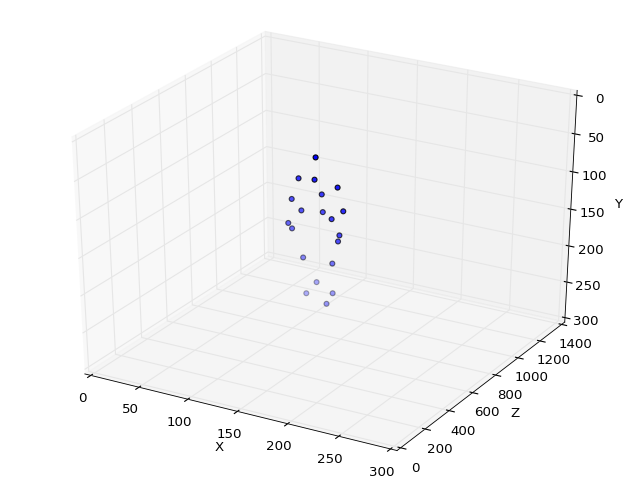

In [15]:
fig = plt.figure()
ax = p3.Axes3D(fig)

# Setting the axes properties
ax.set_xlim3d([0.0, 300.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1400.0])
ax.set_ylabel('Z')

ax.set_zlim3d([300.0, 0.0])
ax.set_zlabel('Y')

graph = ax.scatter([], [], [])


anim = FuncAnimation(fig, animate, frames=data.shape[0], interval=100)
plt.show()

### Save an animation as a video

In [16]:
anim.save('action_a{}s{}i{}_animation.mp4'.format(action, subject, instance))